# Prediction Models on hourly energy demand generation linked to weather


## Preparation & exploration of the datas


In [76]:
# We import everything we need 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


energy_data = pd.read_csv('data/energy_data.csv')
weather_data = pd.read_csv('data/weather_features.csv')
weather_data.dtypes

dt_iso                  object
city_name               object
temp                   float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed               int64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

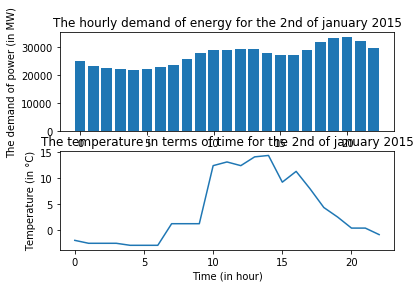

In [81]:
# We extract datas

def initialize_data(df1, df2):
    variable = df2[['humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'snow_3h']].copy()
    variable['temp'] = df2[['temp']] -273.15
    variable['total load actual'] = df1[['total load actual']]
    variable_array = np.array(variable)
    return variable_array


vector = initialize_data(energy_data, weather_data)

# The hourly demand of energy for the 2nd of january 2015.
plt.subplot(211)
plt.bar(np.arange(0,23,1),vector[25:48,6])
plt.xlabel('Time (in hour)')
plt.ylabel('The demand of power (in MW)')
plt.title('The hourly demand of energy for the 2nd of january 2015')

# The temperature in terms of time for the 2nd of januray 2015
plt.subplot(212)
plt.plot(np.arange(0,23,1),vector_weather[25:48,5])
plt.xlabel('Time (in hour)')
plt.ylabel('Temperature (in °C)')
plt.title('The temperature in terms of time for the 2nd of january 2015')
plt.show()

As we can see, there is a link between the demand of energy and the temperature, but due to the human activity (work, travel, ...), this link is not revelant enough during the day when the human activity is at his maximum.

In [78]:
# Prepare datas


output_df = energy_data[['total load actual']].copy()
input_df = weather_data[['temp']].copy()
                        
X_train, X_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.25)

ValueError: Found input variables with inconsistent numbers of samples: [178396, 35064]

In [ ]:
# Training 

class my_linear_regression:
    def __init__(self) : # initialize constructor for the object to assign the object its properties
        self.X_train = []
        self.y_train = []
        self.weights = []
        
    def fit(self, X, y) :
        self.X_train = X
        self.y_train = y
        self.weights = np.linalg.solve(X.T@X,X.T@y)
    
    def predict(self,x_test,y_test) : # method of the object that can be used
        self.y_hat=np.sum(x_test*self.weights,axis=1)
        self.MSE=(1/len(self.y_hat))*np.sum((y_test-self.y_hat)**2)
    
        return self.y_hat, self.MSE
    
model_1 = my_linear_regression()
model_1.fit(input_train1,output_train1)
model_1.predict(input_train1,output_train1)